### ISC among twins and control analyses

The goal of this notebook is to measure ISC among twins and compare it against control-twins (i.e. age- and sex-matched controls) non-twins.

The hypothesis is that ISC for twin-pairs will be generally higher than for non-twin pairs (or controls). We will further concretize the control-analyses below and in the follow-up notebooks.

#### Import modules

In [1]:
#!pip install tqdm

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline
import sys, os, nilearn, pickle, glob, shutil, itertools, random
from nilearn import plotting, input_data, datasets
import numpy as np
import pandas as pd
from statsmodels.stats.multitest import multipletests
from utils import *
import warnings
from tqdm import tqdm
warnings.simplefilter("ignore")
from nilearn.masking import compute_brain_mask, apply_mask
from nilearn import image

#!pip install surfplot
#!pip install neuromaps
#!pip install matplotlib --upgrade

n_regions       = 124045


/Users/schmaelz/miniconda3/envs/partlycloudy2env/lib/python3.11/site-packages/nilearn/input_data/__init__.py:23: FutureWarning: The import path 'nilearn.input_data' is deprecated in version 0.9. Importing from 'nilearn.input_data' will be possible at least until release 0.13.0. Please import from 'nilearn.maskers' instead.
  warnings.warn(message, FutureWarning)


#### Reading in Twin-list and computing ISC among twins

In [3]:
twin_df = pd.read_csv('../data/00_dataset_info/twin_df.csv')

twin_list = twin_df[['twin_A_id','twin_B_id']].values.tolist()
print(twin_list[:3])

twin_df.head()

[['sub-0001', 'sub-0018'], ['sub-0003', 'sub-0233'], ['sub-0004', 'sub-0420']]


,Unnamed: 0,family_id,twin_A_id,twin_A_age,twin_A_sex,twin_B_id,twin_B_age,twin_B_sex
0,0,fam-0001,sub-0001,14.0,M,sub-0018,14.0,M
1,1,fam-0116,sub-0003,14.0,M,sub-0233,14.0,F
2,2,fam-0002,sub-0004,11.0,M,sub-0420,11.0,M
3,3,fam-0088,sub-0005,12.0,F,sub-0178,12.0,F
4,4,fam-0178,sub-0006,15.0,M,sub-0329,15.0,F


In [4]:
twin_list[:1]

[['sub-0001', 'sub-0018']]

In [5]:
'''
# Computing ISC (functional) for the real twins
n_twins         = len(twin_list)
iscs_curr_twin_pair   = np.zeros((n_regions+1)) #the additional line is for the anatomical similarity
    
for twin_pair in twin_list:
        filename_1 = '/Volumes/Backup Plus/twins_partly_cloudy_extracted/' + twin_pair[0]  + '_LTR_Z_THP001_LP012_voxelwise.npy'
        twin1_data = np.load(filename_1) 
        filename_2 = '/Volumes/Backup Plus/twins_partly_cloudy_extracted/' + twin_pair[1]  + '_LTR_Z_THP001_LP012_voxelwise.npy'
        twin2_data = np.load(filename_2) 

        for curr_region in tqdm(range(n_regions)):        
            iscs_curr_twin_pair[curr_region] = (np.corrcoef(twin1_data[:,curr_region], twin2_data[:,curr_region])[0,1])
     

        file_a = twin_pair[0]
        file_b = twin_pair[1] 

        f1 = '../data/04_anatomy/' + file_a + '_ses-02_space-MNI152NLin2009cAsym_desc-preproc_T1w.nii.gz'
        f1m = '../data/04_anatomy/' + file_a + '_ses-02_space-MNI152NLin2009cAsym_desc-brain_mask.nii.gz'
        f1_masked = apply_mask(f1, compute_brain_mask(f1m, threshold=0.01, mask_type='whole-brain'))

        f2 = '../data/04_anatomy/' + file_b + '_ses-02_space-MNI152NLin2009cAsym_desc-preproc_T1w.nii.gz'
        f2m = '../data/04_anatomy/' + file_b + '_ses-02_space-MNI152NLin2009cAsym_desc-brain_mask.nii.gz'
        f2_masked = apply_mask(f2, compute_brain_mask(f2m, threshold=0.01, mask_type='whole-brain'))

        anatomical_similarity_twins = np.corrcoef(f1_masked, f2_masked)[0,1]
        iscs_curr_twin_pair[(curr_region+1)] = anatomical_similarity_twins
        outpath = '/Volumes/Backup Plus/twins_partly_cloudy_extracted/dyadic_isc/' + 'twin_isc_' + twin_pair[0] + '_' + twin_pair[1] + '.npy' 
        np.save(outpath, iscs_curr_twin_pair) #'''
print(' ')

#### Reading in ControlTwin-List and computing ISC among control-twins

In [6]:
controltwin_df = pd.read_csv('../data/00_dataset_info/matched_controltwin_df.csv')

controltwin_list = controltwin_df[['twin_A_id','controltwin_B_id']].values.tolist()
print(controltwin_list[:3])

controltwin_df.head()

[['sub-0001', 'sub-0003'], ['sub-0004', 'sub-0151'], ['sub-0005', 'sub-0043']]


,family_id,twin_A_id,twin_A_age,twin_A_sex,controlfamily_id,controltwin_B_id,controltwin_B_age,controltwin_B_sex
0,fam-0001,sub-0001,14,M,fam-0116,sub-0003,14,M
1,fam-0002,sub-0004,11,M,fam-0038,sub-0151,11,M
2,fam-0088,sub-0005,12,F,fam-0151,sub-0043,12,F
3,fam-0178,sub-0006,15,M,fam-0007,sub-0017,15,M
4,fam-0003,sub-0007,10,F,fam-0137,sub-0261,10,F


In [7]:
'''
# Computing ISC (functional) for the real twins
n_twins         = len(controltwin_list)
iscs_curr_twin_pair   = np.zeros((n_regions+1)) #the additional line is for the anatomical similarity
    
for twin_pair in controltwin_list:
        filename_1 = '/Volumes/Backup Plus/twins_partly_cloudy_extracted/' + twin_pair[0]  + '_LTR_Z_THP001_LP012_voxelwise.npy'
        twin1_data = np.load(filename_1) 
        filename_2 = '/Volumes/Backup Plus/twins_partly_cloudy_extracted/' + twin_pair[1]  + '_LTR_Z_THP001_LP012_voxelwise.npy'
        twin2_data = np.load(filename_2) 

        for curr_region in tqdm(range(n_regions)):        
            iscs_curr_twin_pair[curr_region] = (np.corrcoef(twin1_data[:,curr_region], twin2_data[:,curr_region])[0,1])
     

        file_a = twin_pair[0]
        file_b = twin_pair[1] 

        f1 = '../data/04_anatomy/' + file_a + '_ses-02_space-MNI152NLin2009cAsym_desc-preproc_T1w.nii.gz'
        f1m = '../data/04_anatomy/' + file_a + '_ses-02_space-MNI152NLin2009cAsym_desc-brain_mask.nii.gz'
        f1_masked = apply_mask(f1, compute_brain_mask(f1m, threshold=0.01, mask_type='whole-brain'))

        f2 = '../data/04_anatomy/' + file_b + '_ses-02_space-MNI152NLin2009cAsym_desc-preproc_T1w.nii.gz'
        f2m = '../data/04_anatomy/' + file_b + '_ses-02_space-MNI152NLin2009cAsym_desc-brain_mask.nii.gz'
        f2_masked = apply_mask(f2, compute_brain_mask(f2m, threshold=0.01, mask_type='whole-brain'))

        anatomical_similarity_twins = np.corrcoef(f1_masked, f2_masked)[0,1]
        iscs_curr_twin_pair[(curr_region+1)] = anatomical_similarity_twins
        outpath = '/Volumes/Backup Plus/twins_partly_cloudy_extracted/dyadic_isc/' + 'controltwin_isc_' + twin_pair[0] + '_' + twin_pair[1] + '.npy' 
        np.save(outpath, iscs_curr_twin_pair) #'''
print(' ')

#### Computing ISC among random people

In [8]:
n_regions

124045

In [9]:
'''# Computing ISC (functional) for random others
n_twins         = len(controltwin_list)
iscs_curr_twin_pair   = np.zeros((n_regions+1)) #the additional line is for the anatomical similarity
    
for twin_pair in twin_list:
        filename_1 = '/Volumes/Backup Plus/twins_partly_cloudy_extracted/' + twin_pair[0]  + '_LTR_Z_THP001_LP012_voxelwise.npy'
        twin1_data = np.load(filename_1) 
        
        #from the remaining people, randomly chose one, excluding the actual twin
        other_twin_list = twin_df['twin_B_id'].values.tolist()
        other_people = [x for x in other_twin_list if x != twin_pair[1]]  
        no_twin_id = random.choice(other_people)
        no_twin_filename_1 = '/Volumes/Backup Plus/twins_partly_cloudy_extracted/' + no_twin_id  + '_LTR_Z_THP001_LP012_voxelwise.npy'
        no_twin_data1 = np.load(no_twin_filename_1) 

        for curr_region in tqdm(range(n_regions)):        
            iscs_curr_twin_pair[curr_region] = (np.corrcoef(twin1_data[:,curr_region], no_twin_data1[:,curr_region])[0,1])
     

        file_a = twin_pair[0]
        file_b = twin_pair[1] 

        f1 = '../data/04_anatomy/' + file_a + '_ses-02_space-MNI152NLin2009cAsym_desc-preproc_T1w.nii.gz'
        f1m = '../data/04_anatomy/' + file_a + '_ses-02_space-MNI152NLin2009cAsym_desc-brain_mask.nii.gz'
        f1_masked = apply_mask(f1, compute_brain_mask(f1m, threshold=0.01, mask_type='whole-brain'))

        f2 = '../data/04_anatomy/' + no_twin_id + '_ses-02_space-MNI152NLin2009cAsym_desc-preproc_T1w.nii.gz'
        f2m = '../data/04_anatomy/' + no_twin_id + '_ses-02_space-MNI152NLin2009cAsym_desc-brain_mask.nii.gz'
        f2_masked = apply_mask(f2, compute_brain_mask(f2m, threshold=0.01, mask_type='whole-brain'))

        anatomical_similarity_twins = np.corrcoef(f1_masked, f2_masked)[0,1]
        iscs_curr_twin_pair[(curr_region+1)] = anatomical_similarity_twins
        outpath = '/Volumes/Backup Plus/twins_partly_cloudy_extracted/dyadic_isc/' + 'notwin_isc_' + twin_pair[0] + '_' + twin_pair[1] + '.npy' 
        np.save(outpath, iscs_curr_twin_pair) #'''
print(' ')

### After having precomputed these results, we can now load, combine and plot them

In [10]:
# load twin_data
twin_isc_list = []
for twin_pair in twin_list:
        loadpath = '/Volumes/Backup Plus/twins_partly_cloudy_extracted/dyadic_isc/' + 'twin_isc_' + twin_pair[0] + '_' + twin_pair[1] + '.npy' 
        twin_isc_list.append(np.load(loadpath))

twin_isc_array = np.asarray(twin_isc_list)
del twin_isc_list

# load controltwin_data
control_twin_isc_list = []
for twin_pair in controltwin_list:
        loadpath = '/Volumes/Backup Plus/twins_partly_cloudy_extracted/dyadic_isc/' + 'controltwin_isc_' + twin_pair[0] + '_' + twin_pair[1] + '.npy' 
        control_twin_isc_list.append(np.load(loadpath))

controltwin_isc_array = np.asarray(control_twin_isc_list)
del control_twin_isc_list



# load notwin_data
notwin_list = [f for f in glob.glob("/Volumes/Backup Plus/twins_partly_cloudy_extracted/dyadic_isc/notwin_isc_*")]
no_twin_isc_list = []
for twin_pair in notwin_list:
        loadpath = twin_pair 
        no_twin_isc_list.append(np.load(loadpath))

notwin_isc_array = np.asarray(no_twin_isc_list)
del notwin_list

In [11]:
print(twin_isc_array.shape)
print(controltwin_isc_array.shape)
print(notwin_isc_array.shape)


(100, 124046)
(100, 124046)
(100, 124046)


#### Compute averages and plot

In [12]:
reg_mean_twin_iscs        = np.mean(twin_isc_array, axis = 0)
reg_mean_controltwin_iscs = np.mean(controltwin_isc_array, axis = 0)
reg_mean_notwin_iscs      = np.mean(notwin_isc_array, axis = 0)

print(reg_mean_twin_iscs.shape)
print(reg_mean_controltwin_iscs.shape)
print(reg_mean_notwin_iscs.shape)

(124046,)
(124046,)
(124046,)


In [13]:
#plt.figure(figsize = (10,2));
#plt.plot(reg_mean_notwin_iscs, color = 'blue', label='no twins');
#plt.plot(reg_mean_controltwin_iscs, color = 'green', label='no twins');
#plt.plot(reg_mean_twin_iscs, color = 'red', label='twins');
#plt.legend();

In [14]:
reg_mean_twin_iscs[:-1].shape

(124045,)

In [15]:
from nilearn.maskers import NiftiMasker
brain_masker = NiftiMasker( #mask_img = mask_path,
                            detrend     = True, 
                            standardize = True,
                            high_pass   = 0.01, 
                            t_r         = 0.8, 
                            low_pass    = 0.12,
                            mask_strategy = 'whole-brain-template',
                          );
brain_masker.fit('/Volumes/Backup Plus/twins_fmriprep/sub-0001/ses-02/func/sub-0001_ses-02_task-partlycloudy_space-MNI152NLin2009cAsym_desc-preproc_bold.nii.gz')


NiftiMasker(detrend=True, high_pass=0.01, low_pass=0.12,
            mask_strategy='whole-brain-template', standardize=True, t_r=0.8)

In [16]:
diff = reg_mean_twin_iscs - reg_mean_controltwin_iscs
diff.shape

(124046,)

In [17]:
r = np.reshape(diff[:-1], (reg_mean_twin_iscs[:-1].shape[0],1)).T
r.shape

(1, 124045)

(array([4.7000e+01, 8.6700e+02, 7.3890e+03, 2.6383e+04, 4.2134e+04,
        3.1334e+04, 1.1171e+04, 2.0070e+03, 1.5600e+02, 5.0000e+00]),
 array([-0.07255256, -0.05522234, -0.03789212, -0.0205619 , -0.00323168,
         0.01409853,  0.03142875,  0.04875897,  0.06608919,  0.08341941,
         0.10074963]),
 <BarContainer object of 10 artists>)

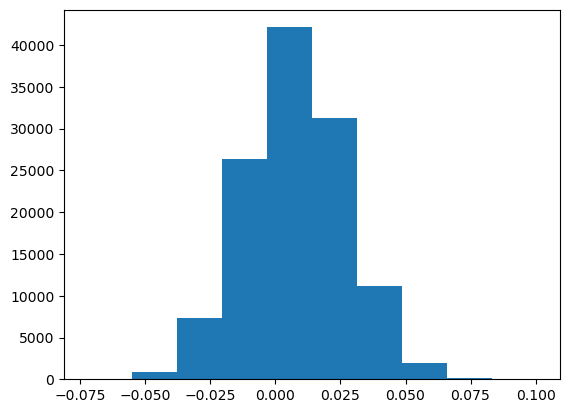

In [18]:
plt.hist(diff)

In [19]:
curr_img = brain_masker.inverse_transform(r);
curr_img


<Figure size 2000x1500 with 0 Axes>

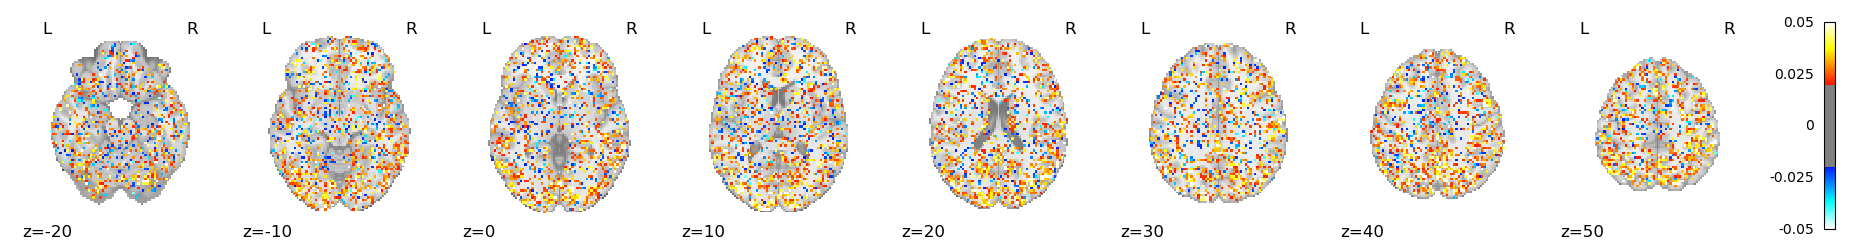

In [22]:
#curr_isc = isc_result_dict['ISC']  #np.reshape(ISC, (293,1)).T
plt.figure(figsize = (20,15));
nilearn.plotting.plot_stat_map(nilearn.image.index_img(curr_img,0), 
                                   threshold      = 0.02, 
                                   vmax           = 0.05, 
                                   draw_cross     = True,
                                   display_mode   = 'z',
                                   cut_coords     = [ -20, -10, 0, 10, 20,  30, 40, 50],
                                   symmetric_cbar = True,
                                   annotate       = True,);

plt.show();